<a href="https://colab.research.google.com/github/AnaRecio/Bank-Marketing-Campaign/blob/main/Bitso_Case_Ana_Recio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timezone
import matplotlib.pyplot as plt
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Data reading and exploration


In [2]:
directory_path = '/content/gdrive/MyDrive/databases_csv/'
filenames = ['ds_deposit.csv', 'ds_master_user_static.csv', 'ds_price_data.csv', 'ds_trade.csv', 'ds_user_balance.csv', 'ds_withdrawal.csv']


dataframes = {}

for filename in filenames:
    file_path = os.path.join(directory_path, filename)
    base_name = os.path.splitext(filename)[0]
    globals()[base_name] = pd.read_csv(file_path)
    print(base_name)



ds_deposit
ds_master_user_static
ds_price_data
ds_trade
ds_user_balance
ds_withdrawal


In [3]:
ds_deposit.head()

,Unnamed: 0,created,user_id,method,currency,amount
0,1,2020-12-22 02:47:47.184+00,1672,adm,gnt,9.798667e+05
1,2,2020-12-21 20:13:17.757+00,1672,spei,mxn,1.997648e+08
2,3,2020-12-17 15:56:47.798+00,1726,bt,btc,1.089150e-03
3,4,2020-12-16 20:38:44.443+00,1726,bt,btc,1.215840e-03
4,5,2020-12-16 20:33:28.546+00,1726,bt,btc,1.216380e-03


In [4]:
ds_master_user_static.head()

,user_id,lastseen,gender,created,language,country_code,status,is_business,dob
0,1609,2020-01-07 21:54:56.768+00,M,2020-01-07 21:54:56.766+00,es,MX,active,f,1992-09-07
1,1612,2020-01-08 17:13:17.436+00,M,2020-01-08 17:13:17.434+00,en,AR,active,f,1992-05-19
2,1613,2020-01-08 19:20:50.17+00,M,2020-01-08 19:20:50.161+00,en,AR,active,f,1986-08-26
3,1615,2020-01-08 23:31:22.742+00,NaN,2020-01-08 23:28:54.309+00,en,MX,active,f,NaN
4,1628,2020-01-09 21:55:09.154+00,M,2020-01-09 21:55:09.153+00,es,AR,active,f,1986-12-12


In [5]:
ds_price_data.head()

,date,major_currency,mxn,usd,ars,brl
0,2020-12-01,btc,355793.9458,17664.7246,2.555003e+06,94202.6386
1,2020-12-01,ltc,1771.3489,87.9452,1.287310e+04,468.9954
2,2020-12-01,bch,6007.6954,298.2745,4.049517e+04,1590.6419
3,2020-12-01,dai,20.1720,1.0015,1.450875e+02,5.3409
4,2020-12-01,tusd,20.0366,0.9947,1.434101e+02,5.3050


In [6]:
ds_trade.head()

,trade_id,created,major_user_id,major_currency,amount,major_fee,rate,minor_user_id,minor_currency,value,minor_fee
0,3766755,2020-12-05 02:09:46.491,6379,eth,4.119801,0.001648,569.5300,6381,usd,2346.350286,0.000000
1,4589262,2020-12-29 17:12:13.433,6380,xrp,2546.000000,1.018400,0.1812,6381,usd,461.335200,0.000000
2,3758879,2020-12-01 12:58:13.639,6379,eth,60.320572,0.000000,579.8900,6380,usd,34979.296468,13.991719
3,3784762,2020-12-05 13:01:31.952,6377,xrp,4440.570607,1.776228,0.5897,6381,usd,2618.604487,0.000000
4,4462828,2020-12-23 03:36:36.206,6378,btc,0.103375,0.000134,480214.3300,6377,mxn,49641.973882,0.000000


In [7]:
ds_user_balance.head()

,date,user_ud,balance_usd
0,2023-08-20,8282063,0.0000
1,2023-08-20,8498396,0.0000
2,2023-08-20,8575062,9.2211
3,2023-08-20,8748959,7.5947
4,2023-08-20,8732809,0.0000


In [8]:
ds_withdrawal.head()

,Unnamed: 0,created,user_id,method,currency,amount
0,1,2020-12-10 18:46:21.384+00,1718,eth_erc20,usd,10.84
1,2,2020-12-08 17:11:58.036+00,1718,eth_erc20,usd,12.01
2,3,2020-12-10 21:53:44.504+00,1718,bt,btc,0.01
3,4,2020-12-01 21:46:25.935+00,1718,bt,eth,1.00
4,5,2020-12-30 23:52:36.779+00,3309,bt,mxn,200.00


In [9]:
dataframe_names = ['ds_deposit', 'ds_master_user_static', 'ds_price_data', 'ds_trade', 'ds_user_balance', 'ds_withdrawal']

for name in dataframe_names:
    df = globals()[name]
    print(name)
    print(df.info())
    print("\n")

ds_deposit
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1462 non-null   int64  
 1   created     1462 non-null   object 
 2   user_id     1462 non-null   int64  
 3   method      1462 non-null   object 
 4   currency    1462 non-null   object 
 5   amount      1462 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 68.7+ KB
None


ds_master_user_static
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6415 entries, 0 to 6414
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       6415 non-null   int64 
 1   lastseen      6415 non-null   object
 2   gender        1111 non-null   object
 3   created       6415 non-null   object
 4   language      6415 non-null   object
 5   country_code  6410 non-null   object
 6   status        64

Important Notes


1.   ds_deposit: "created" column should be transormed a date
2.   ds_master_user_static: Important amount of nulls for "gender" and "DOB
1.   ds_master_user_static: 5 nulls on column "country_code", to replace with unknown given that his column will be used for analysis
1.   ds_master_user_static: "lastseen" and "created" columns should be transformed to dates
2.   ds_price_data: "date" column should be transformed to date
1.   ds_trade: "created" column should be transormed a date
2.   ds_user_balance: "date" column should be transformed to date
1.   ds_withdrawal:"created" column should be transormed a date












## Required Data Transformation (Following above notes)

In [10]:
from dateutil.parser import parse

In [11]:
ds_deposit['created'] = ds_deposit['created'].apply(lambda x: parse(x))
ds_deposit['created'] = pd.to_datetime(ds_deposit['created'])
ds_deposit['created'].dtypes

datetime64[ns, tzlocal()]

In [12]:
ds_master_user_static["country_code"].fillna("UNK", inplace=True)
ds_master_user_static["country_code"].isna().sum()

0

In [13]:
ds_master_user_static["created"] = ds_master_user_static["created"].apply(lambda x: parse(x))
ds_master_user_static["created"] = pd.to_datetime(ds_master_user_static["created"])
ds_master_user_static["lastseen"] = ds_master_user_static["lastseen"].apply(lambda x: parse(x))
ds_master_user_static["lastseen"] = pd.to_datetime(ds_master_user_static["lastseen"])
ds_master_user_static[["created","lastseen"]].dtypes

created     datetime64[ns, tzlocal()]
lastseen    datetime64[ns, tzlocal()]
dtype: object

In [14]:
ds_price_data["date"] = pd.to_datetime(ds_price_data["date"])
ds_price_data["date"].dtypes

dtype('<M8[ns]')

In [15]:
ds_trade["created"] = ds_trade["created"].apply(lambda x: parse(x))
ds_trade['created'] = pd.to_datetime(ds_trade['created'])
ds_trade['created'] .dtypes

dtype('<M8[ns]')

In [16]:
ds_user_balance["date"] = pd.to_datetime(ds_user_balance["date"] )
ds_user_balance["date"].dtypes

dtype('<M8[ns]')

In [17]:
ds_withdrawal['created'] = ds_withdrawal['created'].apply(lambda x: parse(x))
ds_withdrawal['created'] = pd.to_datetime(ds_withdrawal['created'])
ds_withdrawal['created'].dtypes

datetime64[ns, tzlocal()]

#Questions

#1. Deposits & withdrawals matters

1.1. Get the number of users that deposit and withdraw every week

In [18]:
ds_withdrawal['transaction_type'] = 'withdrawal'
ds_deposit['transaction_type'] = 'deposit'

combined_df = pd.concat([ds_withdrawal, ds_deposit])

combined_df['transaction_week'] = combined_df['created'].dt.strftime('%U')

grouped_df = combined_df.groupby('transaction_week').size().reset_index(name='count')

print(grouped_df)


  transaction_week  count
0               48    827
1               49    614
2               50    763
3               51    634
4               52    143


1.2. Get the weekly Net Deposited amount.

In [19]:
combined_df['transaction_day'] = combined_df['created'].dt.strftime('%D')
combined_df['transaction_day'] = pd.to_datetime(combined_df['transaction_day'], format='%m/%d/%y')
grouped2_df = combined_df.groupby(['transaction_day', 'transaction_week', 'transaction_type', 'currency'])['amount'].sum().reset_index()
combined_df['transaction_day'] = pd.to_datetime(combined_df['transaction_day'])
merged2_df = pd.merge(grouped2_df, ds_price_data, left_on=['transaction_day', 'currency'], right_on=['date', 'major_currency'], how='left')
merged2_df['amount_usd'] = merged2_df['amount'] * merged2_df['usd']
merged2_df.drop(['usd', 'major_currency', 'mxn', 'ars', 'brl', 'date'], axis=1, inplace=True)
merged2_df.head()

,transaction_day,transaction_week,transaction_type,currency,amount,amount_usd
0,2020-12-01,48,deposit,btc,2.0,35329.4492
1,2020-12-01,48,deposit,mxn,5721.0,283.7616
2,2020-12-01,48,deposit,usd,200000.0,200000.0000
3,2020-12-01,48,withdrawal,dai,4.6,4.6069
4,2020-12-01,48,withdrawal,eth,1.0,598.5730


In [20]:
grouped3_df = merged2_df.groupby(['transaction_week','transaction_type'])['amount_usd'].sum().reset_index()
pivot_df = grouped3_df.pivot(index='transaction_week', columns='transaction_type', values='amount_usd').reset_index()
pivot_df['net_deposit'] = pivot_df['deposit'] - pivot_df['withdrawal']
pd.options.display.float_format = '{:,.2f}'.format
pivot_df

transaction_type,transaction_week,deposit,withdrawal,net_deposit
0,48,"3,803,327,612.94","16,198.69","3,803,311,414.25"
1,49,"3,343,997.53","559,210.42","2,784,787.12"
2,50,"21,441,728,598.08","3,171.33","21,441,725,426.75"
3,51,"20,493,888.03","1,741.54","20,492,146.49"
4,52,"28,548,759,406.89","1,016.01","28,548,758,390.88"


1.3. Divide the number of deposits and withdrawals by fiat and crypto. Note:
currencies that are not crypto (fiat) are: mxn, ars, usd, and brl

In [21]:
fiat = ['mxn', 'ars', 'usd', 'brl']

combined_df['currency_type'] = np.where(combined_df['currency'].isin(fiat), 'fiat', 'crypto')

grouped3_df = combined_df.groupby(['currency_type', 'transaction_type']).size().unstack(fill_value=0)

fiat_deposits = grouped3_df.loc['fiat', 'deposit']
fiat_withdrawals = grouped3_df.loc['fiat', 'withdrawal']
crypto_deposits = grouped3_df.loc['crypto', 'deposit']
crypto_withdrawals = grouped3_df.loc['crypto', 'withdrawal']

print("Fiat Deposits:", fiat_deposits)
print("Fiat Withdrawals:", fiat_withdrawals)
print("Crypto Deposits:", crypto_deposits)
print("Crypto Withdrawals:", crypto_withdrawals)


Fiat Deposits: 1268
Fiat Withdrawals: 1455
Crypto Deposits: 194
Crypto Withdrawals: 64


1.4. What country has more active users every week? An active user is a user
who either deposited or withdrew

In [22]:

active_users = ds_master_user_static[ds_master_user_static['status'] == 'active']

grouped_active_users = active_users.groupby('country_code').size().reset_index(name='active_users_count')

sorted_active_users = grouped_active_users.sort_values(by='active_users_count', ascending=False)

sorted_active_users.head(5)

,country_code,active_users_count
30,MX,3652
2,AR,2310
6,CA,57
4,BR,25
1,AF,20


#2. Revenue

2.1. Get the total weekly revenue divided between trades and withdrawals
revenue.

In [23]:
major_transactions = ds_trade[['trade_id', 'major_user_id', 'major_currency', 'amount', 'major_fee', 'created']]
minor_transactions = ds_trade[['trade_id', 'minor_user_id', 'minor_currency', 'value', 'minor_fee', 'created']]

In [24]:
major_transactions['created'] = pd.to_datetime(major_transactions['created'])
major_transactions['transaction_day'] = major_transactions['created'].dt.strftime('%Y-%m-%d')
major_transactions['transaction_day'] = pd.to_datetime(major_transactions['transaction_day'])
major_transactions.columns = ['trade_id', 'user_id', 'currency', 'amount', 'fee', 'created', 'transaction_day']
major_transactions['transaction_day'].dtypes

<ipython-input-24-19a984af6d21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_transactions['created'] = pd.to_datetime(major_transactions['created'])
<ipython-input-24-19a984af6d21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  major_transactions['transaction_day'] = major_transactions['created'].dt.strftime('%Y-%m-%d')
<ipython-input-24-19a984af6d21>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

dtype('<M8[ns]')

In [25]:
minor_transactions['created'] = pd.to_datetime(minor_transactions['created'])
minor_transactions['transaction_day'] = minor_transactions['created'].dt.strftime('%Y-%m-%d')
minor_transactions['transaction_day'] = pd.to_datetime(minor_transactions['transaction_day'])
minor_transactions.columns = ['trade_id', 'user_id', 'currency', 'amount', 'fee', 'created','transaction_day']
minor_transactions['transaction_day'].dtypes

<ipython-input-25-66e137c6091f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_transactions['created'] = pd.to_datetime(minor_transactions['created'])
<ipython-input-25-66e137c6091f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_transactions['transaction_day'] = minor_transactions['created'].dt.strftime('%Y-%m-%d')
<ipython-input-25-66e137c6091f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

dtype('<M8[ns]')

In [26]:
total_transactions = pd.concat([minor_transactions, major_transactions], ignore_index=True)
total_transactions.head()

,trade_id,user_id,currency,amount,fee,created,transaction_day
0,3766755,6381,usd,"2,346.35",0.00,2020-12-05 02:09:46.491,2020-12-05
1,4589262,6381,usd,461.34,0.00,2020-12-29 17:12:13.433,2020-12-29
2,3758879,6380,usd,"34,979.30",13.99,2020-12-01 12:58:13.639,2020-12-01
3,3784762,6381,usd,"2,618.60",0.00,2020-12-05 13:01:31.952,2020-12-05
4,4462828,6377,mxn,"49,641.97",0.00,2020-12-23 03:36:36.206,2020-12-23


In [63]:
total_transactions_fees = pd.merge(total_transactions, ds_price_data, left_on=['transaction_day', 'currency'], right_on=['date', 'major_currency'], how='left')
total_transactions_fees['fee_usd'] = total_transactions_fees['fee'] * total_transactions_fees['usd']
total_transactions_fees.drop(['major_currency', 'mxn', 'ars', 'brl', 'date'], axis=1, inplace=True)
total_transactions_fees['transaction_week'] = total_transactions_fees['created'].dt.strftime('%U')
total_transactions_fees['transaction_type'] = 'Trade'
total_transactions_fees.head()

,trade_id,user_id,currency,amount,fee,created,transaction_day,usd,fee_usd,transaction_week,transaction_type
0,3766755,6381,usd,"2,346.35",0.00,2020-12-05 02:09:46.491,2020-12-05,1.00,0.00,48,Trade
1,4589262,6381,usd,461.34,0.00,2020-12-29 17:12:13.433,2020-12-29,1.00,0.00,52,Trade
2,3758879,6380,usd,"34,979.30",13.99,2020-12-01 12:58:13.639,2020-12-01,1.00,13.99,48,Trade
3,3784762,6381,usd,"2,618.60",0.00,2020-12-05 13:01:31.952,2020-12-05,1.00,0.00,48,Trade
4,4462828,6377,mxn,"49,641.97",0.00,2020-12-23 03:36:36.206,2020-12-23,0.05,0.00,51,Trade


In [77]:
total_transactions_weekly = total_transactions_fees[['user_id','transaction_week', 'transaction_type', 'fee_usd']]
total_transactions_weekly.head()

,user_id,transaction_week,transaction_type,fee_usd
0,6381,48,Trade,0.00
1,6381,52,Trade,0.00
2,6380,48,Trade,13.99
3,6381,48,Trade,0.00
4,6377,51,Trade,0.00


In [42]:
ds_withdrawal_fees = pd.read_excel('/content/gdrive/MyDrive/databases_csv/Withdrawals Fees.xlsx')
ds_withdrawal_fees.Currency.unique()

array(['BAT (BAT)', 'Bitcoin Cash (BCH)', 'Bitcoin (BTC)', 'Dai (DAI)',
       'Ether (ETH)', 'Litecoin (LTC)', 'MANA (MANA)', 'TrueUSD (TUSD)',
       'Tether USD (USDT)', 'XRP (XRP)'], dtype=object)

In [48]:
ds_withdrawal.method.unique()

array(['eth_erc20', 'bt', 'spei', 'rp', 'bch', 'btc', 'eth', 'adm', 'pts'],
      dtype=object)

In [56]:
method_mapping = {
    'eth_erc20': 'eth',
    'bt': 'bat',
    'bch': 'bch',
    'btc': 'btc',
    'eth': 'eth',
}

default_currency = 'xrp'

ds_withdrawal['currency_method'] = ds_withdrawal['method'].map(method_mapping).fillna(default_currency)

In [72]:
ds_withdrawal_fees_merged = pd.merge(ds_withdrawal, ds_withdrawal_fees, left_on='currency_method', right_on='Currency', how='left')
ds_withdrawal_fees_merged.drop(['currency_method'], axis=1, inplace=True)
ds_withdrawal_fees_merged['transaction_day'] = ds_withdrawal_fees_merged['created'].dt.strftime('%Y-%m-%d')
ds_withdrawal_fees_merged['transaction_day'] = pd.to_datetime(ds_withdrawal_fees_merged['transaction_day'])
ds_withdrawal_fees_merged['transaction_week'] = ds_withdrawal_fees_merged['transaction_day'].dt.strftime('%U')
ds_withdrawal_fees_merged = pd.merge(ds_withdrawal_fees_merged, ds_price_data, left_on=['transaction_day', 'Currency'], right_on=['date', 'major_currency'], how='left')
ds_withdrawal_fees_merged['fee_usd'] = ds_withdrawal_fees_merged['Fee'] * ds_withdrawal_fees_merged['usd']
ds_withdrawal_fees_merged.drop(['usd','major_currency', 'mxn', 'ars', 'brl', 'date'], axis=1, inplace=True)
ds_withdrawal_fees_merged['fee_usd'] = ds_withdrawal_fees_merged['fee_usd'].fillna(0)
ds_withdrawal_fees_merged.head()

,Unnamed: 0,created,user_id,method,currency,amount,transaction_type,Currency,Fee,transaction_day,transaction_week,fee_usd
0,1,2020-12-10 18:46:21.384000+00:00,1718,eth_erc20,usd,10.84,withdrawal,eth,0.00,2020-12-10,49,0.47
1,2,2020-12-08 17:11:58.036000+00:00,1718,eth_erc20,usd,12.01,withdrawal,eth,0.00,2020-12-08,49,0.48
2,3,2020-12-10 21:53:44.504000+00:00,1718,bt,btc,0.01,withdrawal,bat,7.08,2020-12-10,49,0.00
3,4,2020-12-01 21:46:25.935000+00:00,1718,bt,eth,1.00,withdrawal,bat,7.08,2020-12-01,48,0.00
4,5,2020-12-30 23:52:36.779000+00:00,3309,bt,mxn,200.00,withdrawal,bat,7.08,2020-12-30,52,4.27


In [76]:
ds_withdrawal_fees_weekly = ds_withdrawal_fees_merged[['user_id','transaction_week', 'transaction_type', 'fee_usd']]
ds_withdrawal_fees_weekly.head()

,user_id,transaction_week,transaction_type,fee_usd
0,1718,49,withdrawal,0.47
1,1718,49,withdrawal,0.48
2,1718,49,withdrawal,0.00
3,1718,48,withdrawal,0.00
4,3309,52,withdrawal,4.27


In [79]:
total_revenue = pd.concat([ds_withdrawal_fees_weekly, total_transactions_weekly], ignore_index=True)
total_revenue_weekly = total_revenue.groupby(['transaction_week', 'transaction_type'])['fee_usd'].sum()
total_revenue_weekly

transaction_week  transaction_type
48                Trade               46,377.19
                  withdrawal             311.04
49                Trade              131,526.87
                  withdrawal              17.28
50                Trade              211,725.46
                  withdrawal           1,231.20
51                Trade              165,487.63
                  withdrawal           1,193.90
52                Trade              104,098.87
                  withdrawal             234.13
Name: fee_usd, dtype: float64

2.2. How many paying users do we have each week?

In [81]:
total_users_weekly = total_revenue.groupby(['transaction_week'])['user_id'].nunique()
total_users_weekly

transaction_week
48    31
49    25
50    26
51    20
52    14
Name: user_id, dtype: int64

2.3. Get the weekly ARPU (average revenue per user) and ARPPU (average
revenue per paying user).

In [83]:
total_revenue['total_revenue'] = total_revenue.groupby(['user_id', 'transaction_week'])['fee_usd'].transform('sum')

weekly_arpu = total_revenue.groupby('transaction_week')['total_revenue'].mean()

paying_users = total_revenue[total_revenue['total_revenue'] > 0]
weekly_arppu = paying_users.groupby('transaction_week')['total_revenue'].mean()

print("Weekly ARPU:")
print(weekly_arpu)
print("\nWeekly ARPPU:")
print(weekly_arppu)


Weekly ARPU:
transaction_week
48    8,766.35
49   26,011.53
50   41,715.66
51   32,581.64
52   20,596.99
Name: total_revenue, dtype: float64

Weekly ARPPU:
transaction_week
48    8,790.84
49   26,285.08
50   41,722.93
51   32,590.55
52   20,601.00
Name: total_revenue, dtype: float64


#3. Bonus

Replicate the chart by using the data in ds_user_balance.csv.

In [92]:
ds_user_balance = ds_user_balance.sort_values(by=['user_ud', 'date'])

In [94]:
grouped_data = ds_user_balance.groupby('user_ud')

In [107]:
ds_user_balance['prev_month_balance'] = grouped_data['balance_usd'].shift()
ds_user_balance['category'] = 'New user'

In [108]:
new_user_mask = (ds_user_balance['balance_usd'] > 0) & (ds_user_balance['prev_month_balance'].isnull())
ds_user_balance.loc[new_user_mask, 'category'] = 'New user'

steady_user_mask = (ds_user_balance['balance_usd'] > 0) & (ds_user_balance['prev_month_balance'] > 0)
ds_user_balance.loc[steady_user_mask, 'category'] = 'Steady user'

lost_user_mask = (ds_user_balance['balance_usd'] == 0) & (ds_user_balance['prev_month_balance'] > 0)
ds_user_balance.loc[lost_user_mask, 'category'] = 'Lost user'

recovered_user_mask = (ds_user_balance['balance_usd'] > 0) & (ds_user_balance['prev_month_balance'] <= 0)
ds_user_balance.loc[recovered_user_mask, 'category'] = 'Recovered user'

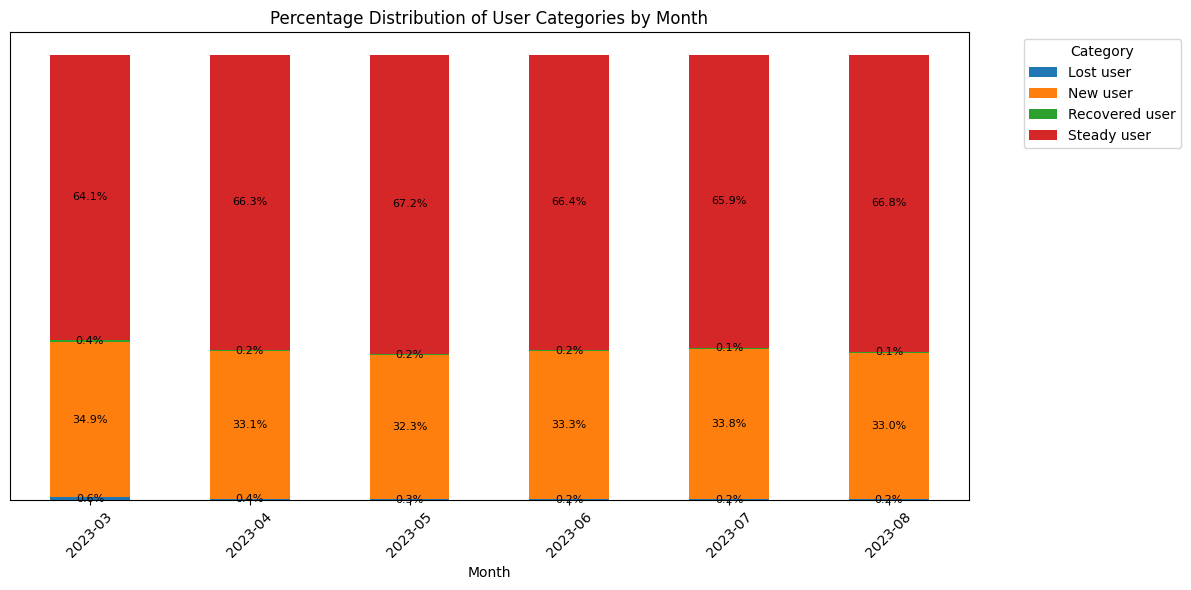

In [112]:
monthly_category_counts = ds_user_balance.groupby([ds_user_balance['date'].dt.strftime('%Y-%m'), 'category']).size().unstack(fill_value=0)
total_users_per_month = monthly_category_counts.sum(axis=1)
percentage_distribution = monthly_category_counts.div(total_users_per_month, axis=0) * 100

ax = percentage_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(f'{height:.1f}%', xy=(left + width / 2, bottom + height / 2), ha='center', va='center', fontsize=8)

plt.title('Percentage Distribution of User Categories by Month')
plt.xlabel('Month')
plt.ylabel('Percentage')

plt.xticks(rotation=45)

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().axes.yaxis.set_visible(False)

plt.tight_layout()

plt.show()
